In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
test_dir =r'C:\Users\Aishwarya Patil\Desktop\ML Projects\CNN models\cats_and_dogs_small\test'
validation_dir =r'C:\Users\Aishwarya Patil\Desktop\ML Projects\CNN models\cats_and_dogs_small\validation'
train_dir =r'C:\Users\Aishwarya Patil\Desktop\ML Projects\CNN models\cats_and_dogs_small\train'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [7]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1,activation ='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [9]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

C:\Games\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [10]:
history =model.fit_generator(train_generator,steps_per_epoch = 100,epochs=20,validation_data = validation_generator,validation_steps = 50)

C:\Users\Aishwarya Patil\AppData\Local\Temp\ipykernel_15780\2942848801.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history =model.fit_generator(train_generator,steps_per_epoch = 100,epochs=20,validation_data = validation_generator,validation_steps = 50)


Epoch 1/20
100/100 [==============================] - 77s 762ms/step - loss: 0.6945 - acc: 0.5230 - val_loss: 0.6705 - val_acc: 0.5800
Epoch 2/20
100/100 [==============================] - 64s 638ms/step - loss: 0.6614 - acc: 0.6155 - val_loss: 0.6429 - val_acc: 0.6490
Epoch 3/20
100/100 [==============================] - 46s 459ms/step - loss: 0.6129 - acc: 0.6695 - val_loss: 0.6691 - val_acc: 0.5740
Epoch 4/20
100/100 [==============================] - 45s 451ms/step - loss: 0.5732 - acc: 0.7095 - val_loss: 0.6016 - val_acc: 0.6720
Epoch 5/20
100/100 [==============================] - 45s 454ms/step - loss: 0.5344 - acc: 0.7240 - val_loss: 0.5972 - val_acc: 0.6730
Epoch 6/20
100/100 [==============================] - 44s 445ms/step - loss: 0.5073 - acc: 0.7540 - val_loss: 0.5686 - val_acc: 0.6930
Epoch 7/20
100/100 [==============================] - 44s 444ms/step - loss: 0.4754 - acc: 0.7710 - val_loss: 0.5598 - val_acc: 0.6970
Epoch 8/20
100/100 [==============================] - 4

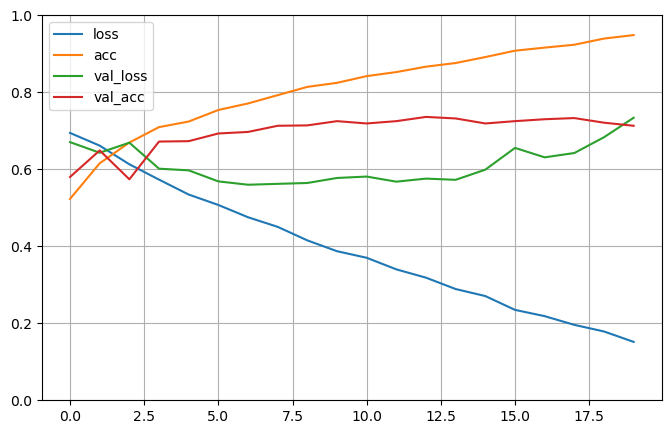

In [11]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Overfitting can be treated by augmenting initial data by applying shear rotation,widthshift,heightshift and flips accuracy can be improved

In [12]:
model.save("model.h5")

In [13]:
from tensorflow.keras import backend as k
k.clear_session()
del model